# K-Nearest Neighbors (KNN), a simple yet powerful machine learning algorithm.

What is K-Nearest Neighbors (KNN)?
KNN is a supervised learning algorithm used for both classification and regression tasks. It works by finding the k nearest data points (neighbors) to a given input and making predictions based on their values.

How KNN Works:
Choose the number of neighbors (k):

k is a hyperparameter that determines how many neighbors to consider.
Calculate the distance:

Compute the distance between the input data point and all other points in the dataset. Common distance metrics:
Euclidean Distance (most common)
Manhattan Distance
Minkowski Distance
Find the k-nearest neighbors:

Sort the distances and select the k closest points.
Make a prediction:

For classification: Use majority voting among the k neighbors.
For regression: Take the average of the k neighbors' values.



-> Advantages of KNN:
Simple to implement.
No assumptions about data distribution (non-parametric).
Effective for small datasets.

-> Disadvantages of KNN:
Computationally expensive for large datasets (distance calculation for all points).
Sensitive to irrelevant features and the choice of k.
Performance depends on the scale of data (requires normalization).


In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#load dataset....
filePath = r'C:\Users\SHIVA KUMAR\Documents\E3sem2\MLlab\lab7\Week7_train.csv'

# Read the csv file
data = pd.read_csv(filePath)

data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#2. access rows  and cols..
data.shape[0]
data.shape[1]

785

In [23]:
# 4.select 10% of data..and we not use total data as KNN 
sample_data = data.sample(frac=0.1, random_state=1)

sample_data


# X_sample = sample_data.iloc[:,:-1].values  # all rows and all columns except last column
# Y_sample = sample_data.iloc[:,-1].values # all rows and last column



print("10% of data has been selected and splitted into training and testing data")


10% of data has been selected and splitted into training and testing data


In [24]:
sample_data.shape

(4200, 785)

In [25]:
# look at 5 top rows
sample_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
29633,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
345,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36369,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16624,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14389,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# 7.find  no. of unique class labels.

unique_labels = sample_data['label'].unique()
print("No. of unique labels labels are:",len(unique_labels))

No. of unique labels labels are: 10


In [27]:
# 8 .find the count of unique labels
label_counts = sample_data['label'].value_counts()
print(f"counts of unique labels..\n{label_counts}")

counts of unique labels..
label
1    488
4    426
3    423
2    421
0    420
9    414
8    411
7    403
6    403
5    391
Name: count, dtype: int64


In [28]:
# 9.prepare X(features) & Y (labels)

X = sample_data.drop('label',axis=1)
Y = sample_data['label']

print(f"X shape:{X.shape} and Y shape:{Y.shape}")



X shape:(4200, 784) and Y shape:(4200,)


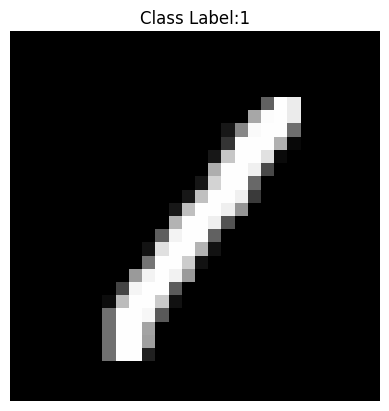

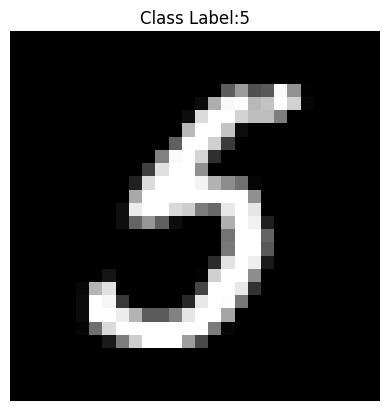

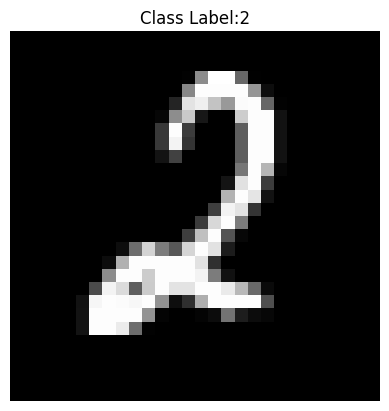

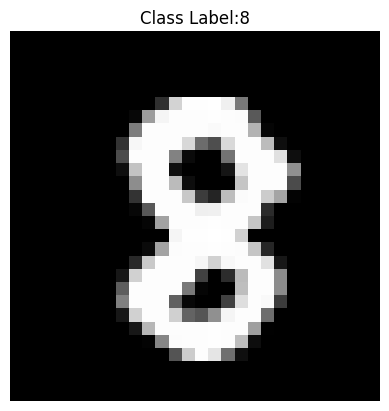

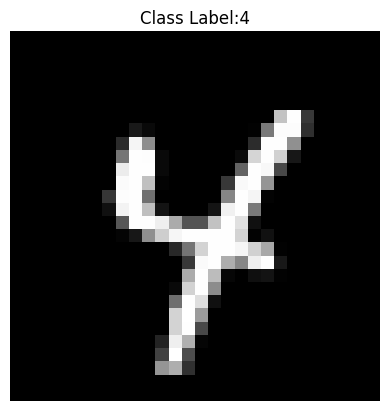

In [29]:
# visualize the image of first 5 digital in X and also print class label in
# Y
import matplotlib.pyplot as plt

for i in range(5):
  image = X.iloc[i].values.reshape(28,28)
  plt.imshow(image,cmap='gray')
  plt.title(f"Class Label:{Y.iloc[i]}")
  plt.axis('off')
  plt.show()




In [30]:
# 11.split the training  dataset into training set(75%) & validation set(25%)...
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train , Y_test =train_test_split(X,Y,test_size=0.25,random_state=1)

print(f"X_train:{X_train.shape} & Y_train:{Y_train.shape}")
print(f"X_test:{X_test.shape} & Y_test:{Y_test.shape}")

'''
Inputs:

X: Features (input data).
Y: Labels (output data).
'''

X_train:(3150, 784) & Y_train:(3150,)
X_test:(1050, 784) & Y_test:(1050,)


'\nInputs:\n\nX: Features (input data).\nY: Labels (output data).\n'

In [31]:
# 12 . fit KNN to classifies to training data.. and default parameters..n_neighbors=3,metric="minkowski",p=2
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
knn.fit(X_train,Y_train)


KNeighborsClassifier()

In [32]:
#14.predict  validation results
y_pred = knn.predict(X_test)
print(y_pred)
print(y_pred.shape)


[1 3 8 ... 5 0 4]
(1050,)


In [33]:
# 14.print confusion matrix
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
print(cm)

[[111   0   1   0   0   0   0   0   0   0]
 [  0 136   0   0   0   0   0   0   0   0]
 [  2   6  80   1   1   0   0   2   1   0]
 [  0   0   2 109   0   4   0   2   2   0]
 [  1   2   1   0 100   0   1   0   0   5]
 [  2   0   0   1   0  79   3   0   0   0]
 [  2   0   0   0   0   1  86   0   0   0]
 [  0   1   0   0   0   0   0  90   0   1]
 [  0   5   1   4   1   5   0   1  86   4]
 [  0   1   0   1   3   2   1   4   0  95]]


In [34]:
# 16.print classfixtion report and accuracy
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(f"classfixtion report and accuracy\n{classification_report(Y_test,y_pred)}")
print(f"Accuracy:{accuracy_score(Y_test,y_pred)}")

classfixtion report and accuracy
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       112
           1       0.90      1.00      0.95       136
           2       0.94      0.86      0.90        93
           3       0.94      0.92      0.93       119
           4       0.95      0.91      0.93       110
           5       0.87      0.93      0.90        85
           6       0.95      0.97      0.96        89
           7       0.91      0.98      0.94        92
           8       0.97      0.80      0.88       107
           9       0.90      0.89      0.90       107

    accuracy                           0.93      1050
   macro avg       0.93      0.92      0.92      1050
weighted avg       0.93      0.93      0.92      1050

Accuracy:0.9257142857142857


       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
16059       0       0       0       0       0       0       0       0       0   
11802       0       0       0       0       0       0       0       0       0   
41680       0       0       0       0       0       0       0       0       0   
20519       0       0       0       0       0       0       0       0       0   
26730       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
16059       0  ...         0         0         0         0         0   
11802       0  ...         0         0         0         0         0   
41680       0  ...         0         0         0         0         0   
20519       0  ...         0         0         0         0         0   
26730       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
16059         0       

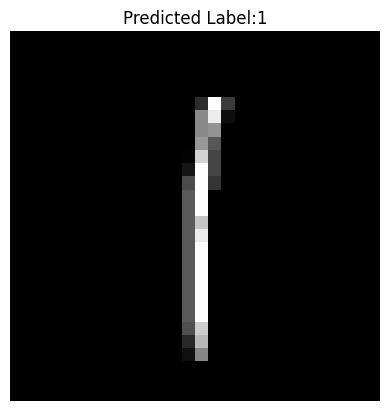

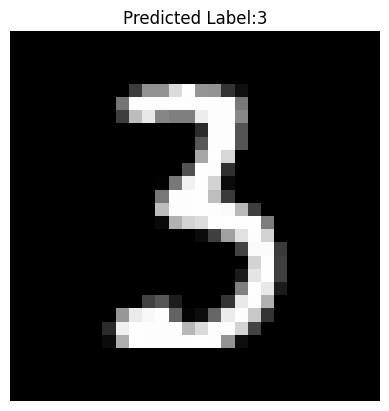

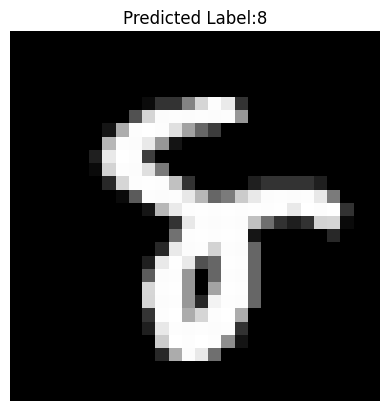

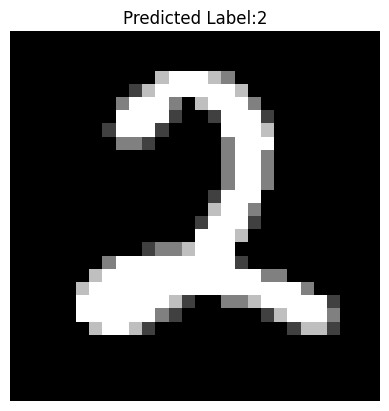

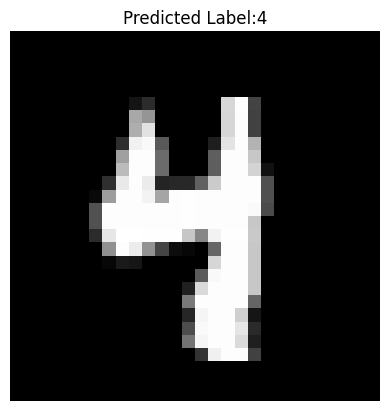

In [35]:
# 17 . visualize the image of first 5 digital in X-test and also print the predicted

print(X_test.head())
print(y_pred[:5])

for i in range(5):
  image = X_test.iloc[i].values.reshape(28,28)
  plt.imshow(image,cmap='gray')
  plt.title(f"Predicted Label:{y_pred[i]}")
  plt.axis('off')
  plt.show()

In [36]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
16232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
X_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
16059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20519,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
Y_train

16232    6
33150    0
39448    4
2877     7
17538    3
        ..
4999     9
1886     6
6135     5
33460    6
40114    3
Name: label, Length: 3150, dtype: int64

In [39]:
Y_test

16059    1
11802    3
41680    8
20519    2
26730    4
        ..
37997    6
9869     7
22196    3
23577    0
9875     4
Name: label, Length: 1050, dtype: int64

In [40]:
# lets test...

image = X_test.iloc[16059].values.reshape(28,28)
plt.imshow(image,cmap='gray')
plt.title(f"Predicted Label:{y_pred[i]}")
plt.axis('off')
plt.show()

IndexError: single positional indexer is out-of-bounds